In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_lfw_people
data = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [5]:
data.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [6]:
print data.DESCR

LFW faces dataset


In [7]:
data.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [8]:
X = data.data
y = data.target

In [9]:
target_names = data.target_names
K = len(target_names)
print target_names
print K

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [10]:
print '            Person      Count '
print '  ----------------------------'
for k in range(K):
    print '%20s    %4s' % (target_names[k], np.count_nonzero(y == k))

            Person      Count 
  ----------------------------
        Ariel Sharon      77
        Colin Powell     236
     Donald Rumsfeld     121
       George W Bush     530
   Gerhard Schroeder     109
         Hugo Chavez      71
          Tony Blair     144


In [11]:
N, h, w = data.images.shape
print N, h, w 

1288 50 37


In [12]:
d = h*w
print d

1850


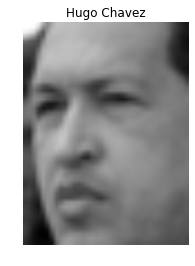

In [13]:
i = 0
plt.imshow(data.images[i], cmap = 'gray')
plt.axis('off')
plt.title(data.target_names[data.target[i]]);

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## SVC

In [15]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
svc_model = GridSearchCV(SVC(kernel = 'rbf', class_weight = 'auto'), param_grid)
svc_model.fit(X_train, y_train)

GridSearchCV(cv=None,
       estimator=SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.0, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 100000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [16]:
y_pred = svc_model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print classification_report(y_test, y_pred, target_names = target_names)
print confusion_matrix(y_test, y_pred)
print np.mean(y_test != y_pred)

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        20
     Colin Powell       0.00      0.00      0.00        59
  Donald Rumsfeld       0.00      0.00      0.00        32
    George W Bush       0.42      1.00      0.59       136
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        35

      avg / total       0.18      0.42      0.25       322

[[  0   0   0  20   0   0   0]
 [  0   0   0  59   0   0   0]
 [  0   0   0  32   0   0   0]
 [  0   0   0 136   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  35   0   0   0]]
0.577639751553


C:\Anaconda\lib\site-packages\sklearn\metrics\metrics.py:1771: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 ${\rm precision} = {\rm tp} / ({\rm tp} + {\rm fp})$ – вероятность, что на фотографии, на которой распознан данный человек, действительно изображен именно он (пациент, у которого диагностировано данное заболевание, действительно его имеет; письмо, распознанное как спам, действительно им является и т.д.)
 
 ${\rm recall} = {\rm sensitivity} = {\rm tp} / ({\rm tp} + {\rm fn})$ – вероятность, что заданный человек распознан правильно (данная болезнь определена; спам определен как спам и т.д.)
 
 $F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ – среднее гармоническое

## PCA + SVC

In [56]:
from sklearn.decomposition import PCA
n_components = 150 # При 300 и выше ошибка начнет возрастать

pca = PCA(n_components = n_components, whiten = True) 
    # whiten = True (отбеливание = декорреляция) дает существенный прирост точности
pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [57]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
svc_model = GridSearchCV(SVC(kernel = 'rbf', class_weight = 'auto'), param_grid)
svc_model.fit(X_train_pca, y_train)

print(svc_model.best_estimator_)

SVC(C=1000.0, cache_size=200, class_weight='auto', coef0=0.0, degree=3,
  gamma=0.005, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)


In [58]:
y_pred = svc_model.predict(X_test_pca)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print classification_report(y_test, y_pred, target_names = target_names)
print confusion_matrix(y_test, y_pred)
print np.mean(y_test != y_pred)

                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.56      0.69        16
     Colin Powell       0.79      0.83      0.81        59
  Donald Rumsfeld       0.86      0.75      0.80        24
    George W Bush       0.85      0.95      0.90       139
Gerhard Schroeder       0.86      0.86      0.86        28
      Hugo Chavez       1.00      0.71      0.83        14
       Tony Blair       0.97      0.83      0.90        42

      avg / total       0.87      0.86      0.86       322

[[  9   5   1   1   0   0   0]
 [  1  49   0   9   0   0   0]
 [  0   0  18   5   1   0   0]
 [  0   5   2 132   0   0   0]
 [  0   0   0   3  24   0   1]
 [  0   3   0   1   0  10   0]
 [  0   0   0   4   3   0  35]]
0.139751552795


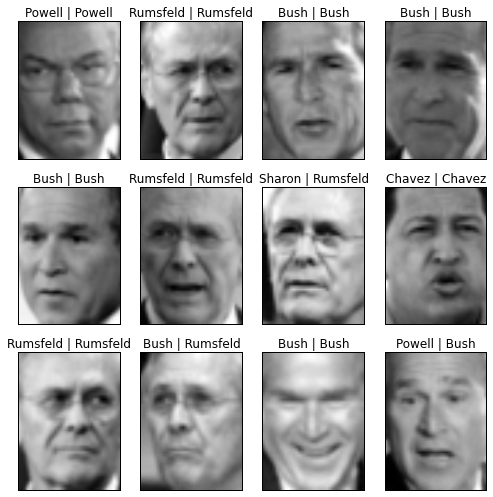

In [63]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize = (2.1*n_col, 2.8*n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = 'gray')
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return '%s | %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

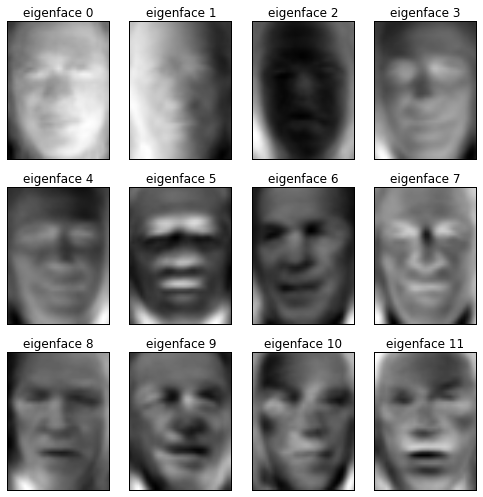

In [62]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

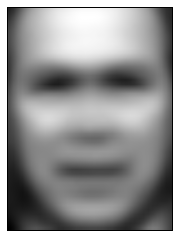

In [55]:
ave_face = np.mean(data.images, axis = 0)
plt.imshow(ave_face, cmap = 'gray')
plt.xticks(())
plt.yticks(());